In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data= sns.load_dataset('titanic')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

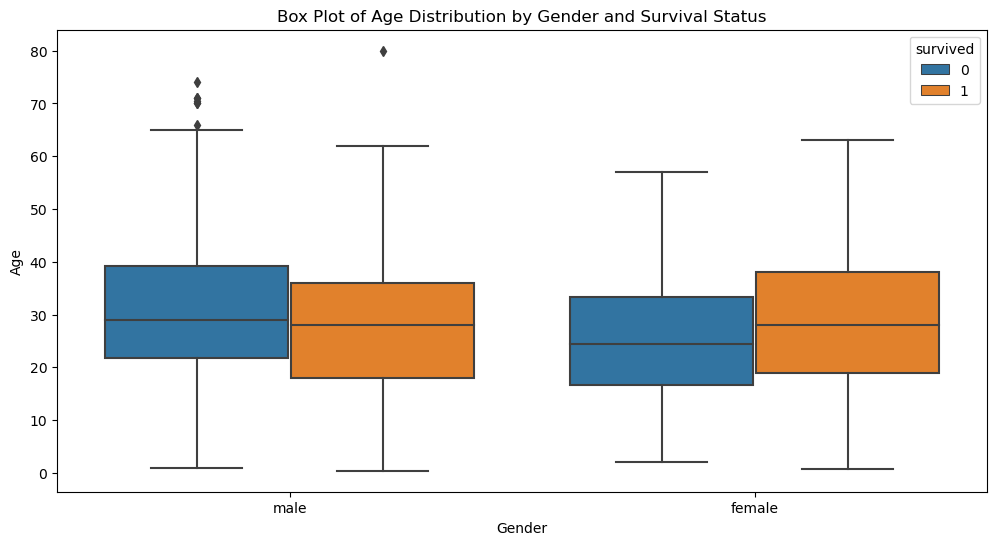

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='sex', y='age', hue='survived')
plt.title('Box Plot of Age Distribution by Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

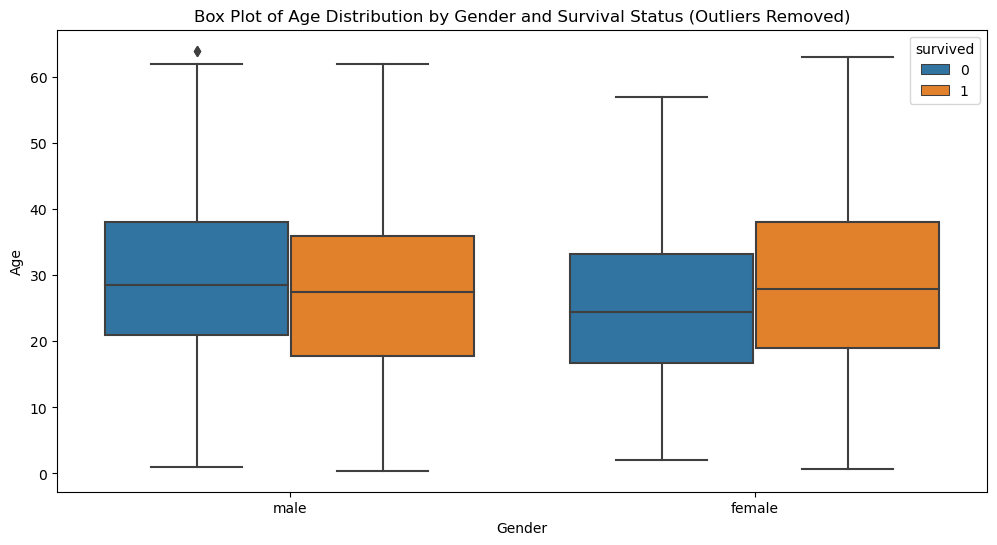

In [15]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for age
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter the data to remove outliers
filtered_titanic = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]
# Create the box plot without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_titanic, x='sex', y='age', hue='survived')
# Set plot title and labels
plt.title('Box Plot of Age Distribution by Gender and Survival Status (Outliers Removed)')
plt.xlabel('Gender')
plt.ylabel('Age')
# Show plot
plt.show()

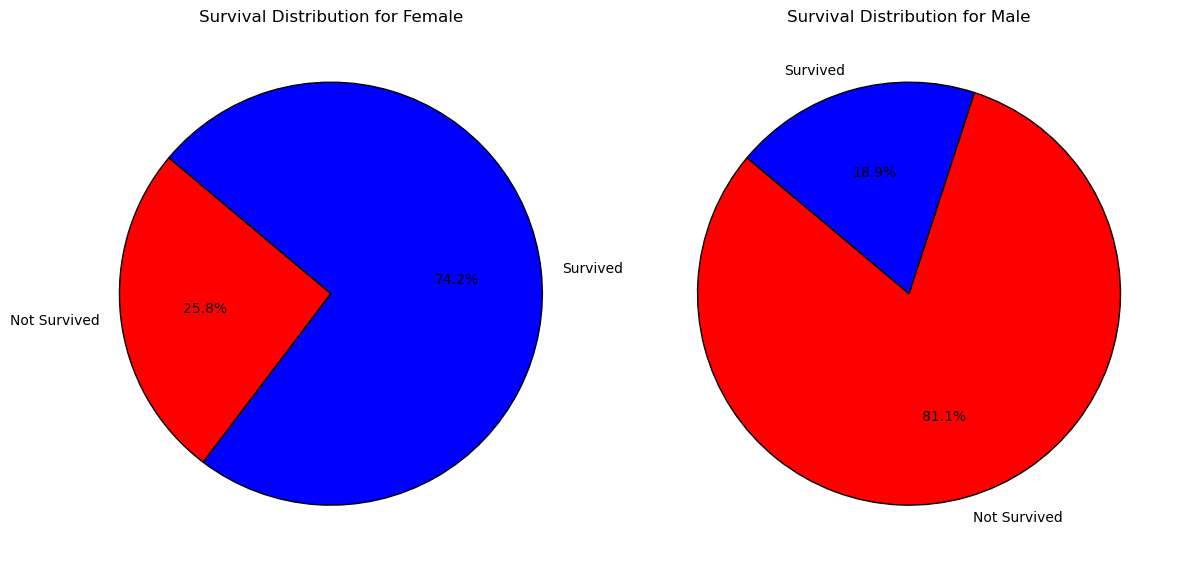

In [16]:
# Count of survival status grouped by gender
survival_counts = df.groupby(['sex', 'survived']).size().unstack()
# Define colors for better visualization
colors = ['red', 'blue'] # Red = Not survived, Blue = Survived
# Create the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, gender in enumerate(survival_counts.index):
 axes[i].pie(
 survival_counts.loc[gender],
 labels=['Not Survived', 'Survived'],
 autopct='%1.1f%%',
 colors=colors,
 startangle=140,
 wedgeprops={'edgecolor': 'black'}
 )
 axes[i].set_title(f'Survival Distribution for {gender.capitalize()}')
# Show plot
plt.tight_layout()
plt.show()

## Steps:

In this data visualization practical, we loaded the Titanic dataset using the Seaborn library.

1. We analyzed the dataset by printing its first five records using `head()`.
2. Using `info()`, we examined the structure and data types of the columns in the dataset.
3. The `describe()` function was used for statistical analysis, giving insights into measures like mean, standard deviation, and percentiles.
4. We identified missing values using `isnull().sum()`.
5. A box plot was created to visualize the age distribution by gender and survival status.
6. Outliers in the `age` column were removed using the Interquartile Range (IQR) method.
7. Another box plot was generated after removing outliers to clearly visualize the refined age distribution by gender and survival status.
8. Finally, pie charts were plotted to display the survival distribution for each gender, providing a visual comparison of survival rates between males and females.

## Observations:

- A significant observation is that the **survival rate of females (74.2%) is much higher than that of males (18.9%)**.
- Conversely, the **non-survival rate is higher for males (81.1%)** compared to females (25.8%).



.

